In [15]:
import pandas as pd


In [ ]:
s = pd.Series(list('asfdsdadfdhaf'))
s

0     a
1     s
2     f
3     d
4     s
5     d
6     a
7     d
8     f
9     d
10    h
11    a
12    f
dtype: object

In [ ]:
s.unique()

array(['a', 's', 'f', 'd', 'h'], dtype=object)

In [ ]:
s.value_counts()

d    4
a    3
f    3
s    2
h    1
dtype: int64

In [16]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')
datos

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22841,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22842,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22843,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22844,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [ ]:
clases = [0,2,4,6,1000]
cuartos = pd.cut(datos.Cuartos, clases)
cuartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
22841    (0.0, 2.0]
22842           NaN
22843    (2.0, 4.0]
22844    (0.0, 2.0]
22845    (0.0, 2.0]
Name: Cuartos, Length: 22846, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 1000]]

In [ ]:
pd.value_counts(cuartos)

(0, 2]       11825
(2, 4]        9879
(4, 6]         703
(6, 1000]       71
Name: Cuartos, dtype: int64

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,10))

In [10]:
area = plt.figure()

<Figure size 1080x720 with 0 Axes>

In [12]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

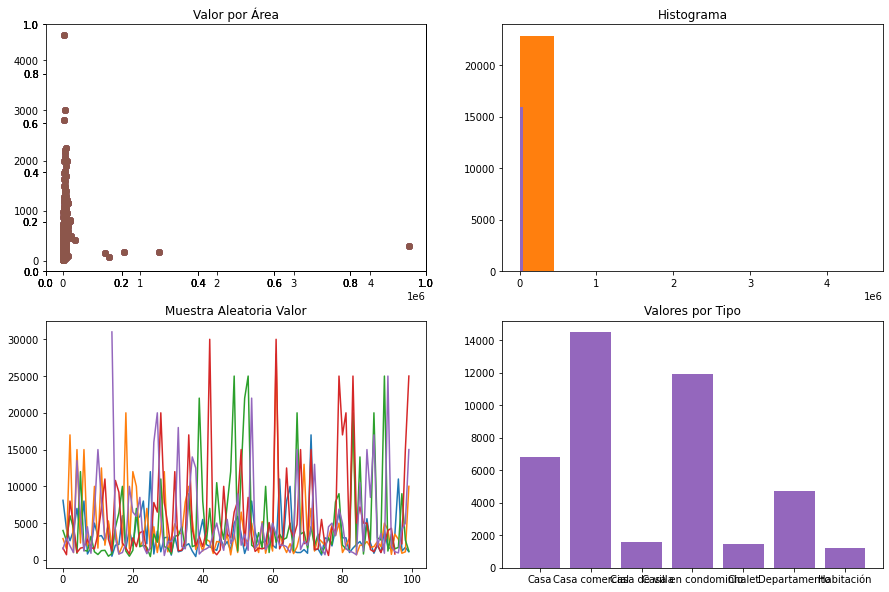

In [24]:
#Crear gráficos
g1.scatter(datos.Valor, datos.Area)
g1.set_title('Valor por Área')

g2.hist(datos.Impuesto)
g2.set_title('Histograma')

g3_muestra = datos.Valor.sample(100)
g3_muestra.index = range(g3_muestra.shape[0])
g3.plot(g3_muestra)
g3.set_title('Muestra Aleatoria Valor')

grupo_g4 = datos.groupby('Tipo')['Valor']
label = grupo_g4.mean().index
values = grupo_g4.mean().values
g4.bar(label, values)
g4.set_title('Valores por Tipo')
area

In [27]:
area.savefig('gráfico.png', dpi=300, bbox_inches='tight')